In [ ]:
!pip install numpy pandas matplotlib==3.7.3 seaborn librosa scikit-learn torch transformers


In [ ]:
!pip install tensorflow

In [3]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [4]:
import os

base_path = './Downloads/LibriSpeech/dev-clean/'

# Lists to hold the features and labels (speaker IDs or gender)
features = []
labels = []

# to extract MFCC features from an audio file
def extract_features(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=16)
    return np.mean(mfccs.T, axis=0)

# Loop over each speaker directory
for speaker_id in os.listdir(base_path):
    speaker_path = os.path.join(base_path, speaker_id)
    
    if not os.path.isdir(speaker_path):
        continue
    
    # Loop over each chapter directory within the speaker directory
    for chapter_id in os.listdir(speaker_path):
        chapter_path = os.path.join(speaker_path, chapter_id)
        
        if not os.path.isdir(chapter_path):
            continue
        
        # Loop over each .flac file
        for audio_file in os.listdir(chapter_path):
            if audio_file.endswith('.flac'):
                file_path = os.path.join(chapter_path, audio_file)
                
                # Extract MFCC features
                mfcc_features = extract_features(file_path)
                features.append(mfcc_features)
                
                # Store the speaker ID as the label
                labels.append(speaker_id)

# Convert to DataFrame
df = pd.DataFrame(features)
df['speaker_id'] = labels

df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,speaker_id
0,-341.682129,63.929272,-40.748856,35.136776,-35.127068,-13.281225,-24.137272,0.502121,-3.608443,-6.894860,-2.822740,-8.377459,-2.088901,-9.628183,-2.167450,-4.892990,2412
1,-427.531311,39.702068,-20.348408,22.840950,-22.858767,-3.782265,-18.592751,0.163958,0.676260,-4.008523,-1.283186,-3.547989,-4.458155,-7.816164,-2.802448,-3.934327,2412
2,-369.549347,62.254398,-28.011257,36.332256,-29.117182,-8.202079,-22.153320,-9.687895,-2.779290,-7.835215,-2.874465,-6.305440,-3.036163,-7.613832,-1.881519,-4.866530,2412
3,-328.970642,74.167641,-47.932758,23.599272,-29.923786,-4.816751,-22.949512,-13.810078,-0.496978,-7.567257,-9.859808,-8.939904,-2.068019,-12.315131,-5.774308,-6.859083,2412
4,-340.118652,66.268257,-40.022591,45.824875,-30.038460,-7.871757,-24.567450,-6.339267,-3.930778,-8.068517,-1.258463,-7.198214,0.638180,-11.327822,-2.550204,-5.153607,2412


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   0               2703 non-null   float32
 1   1               2703 non-null   float32
 2   2               2703 non-null   float32
 3   3               2703 non-null   float32
 4   4               2703 non-null   float32
 5   5               2703 non-null   float32
 6   6               2703 non-null   float32
 7   7               2703 non-null   float32
 8   8               2703 non-null   float32
 9   9               2703 non-null   float32
 10  10              2703 non-null   float32
 11  11              2703 non-null   float32
 12  12              2703 non-null   float32
 13  13              2703 non-null   float32
 14  14              2703 non-null   float32
 15  15              2703 non-null   float32
 16  speaker_id      2703 non-null   object 
 17  gender          2703 non-null   o

In [5]:
unique_speaker_ids = df['speaker_id'].unique()
print(unique_speaker_ids)

['2412' '2078' '3752' '1988' '1919' '422' '3000' '1993' '6313' '251'
 '8842' '5536' '7850' '174' '6295' '7976' '2803' '777' '5694' '1462'
 '5895' '2086' '6241' '2277' '2428' '3536' '2902' '8297' '3081' '6345'
 '652' '3853' '5338' '6319' '3170' '1272' '84' '3576' '1673' '2035']


In [6]:
speaker_info = {}

with open('./Downloads/LibriSpeech/SPEAKERS.txt', 'r') as file:
    for line in file:
        if line.startswith(';'):  
            continue
        parts = line.strip().split('|')
        speaker_id = parts[0].strip()
        gender = parts[1].strip() 
        speaker_info[speaker_id] = gender


In [7]:
df['gender'] = df['speaker_id'].map(speaker_info)
df['gender_numeric'] = df['gender'].apply(lambda x: 1 if x == 'F' else 0)


In [8]:
df.head(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,speaker_id,gender,gender_numeric
0,-341.682129,63.929272,-40.748856,35.136776,-35.127068,-13.281225,-24.137272,0.502121,-3.608443,-6.894860,-2.822740,-8.377459,-2.088901,-9.628183,-2.167450,-4.892990,2412,F,1
1,-427.531311,39.702068,-20.348408,22.840950,-22.858767,-3.782265,-18.592751,0.163958,0.676260,-4.008523,-1.283186,-3.547989,-4.458155,-7.816164,-2.802448,-3.934327,2412,F,1
2,-369.549347,62.254398,-28.011257,36.332256,-29.117182,-8.202079,-22.153320,-9.687895,-2.779290,-7.835215,-2.874465,-6.305440,-3.036163,-7.613832,-1.881519,-4.866530,2412,F,1
3,-328.970642,74.167641,-47.932758,23.599272,-29.923786,-4.816751,-22.949512,-13.810078,-0.496978,-7.567257,-9.859808,-8.939904,-2.068019,-12.315131,-5.774308,-6.859083,2412,F,1
4,-340.118652,66.268257,-40.022591,45.824875,-30.038460,-7.871757,-24.567450,-6.339267,-3.930778,-8.068517,-1.258463,-7.198214,0.638180,-11.327822,-2.550204,-5.153607,2412,F,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-271.068298,89.716675,12.686437,45.737129,8.364235,-1.676046,-3.458455,-20.905085,8.487628,-7.645513,-6.396749,6.074276,2.773393,5.057474,-4.009227,-1.523446,2078,M,0
96,-264.564056,89.657242,9.509440,37.921543,8.492599,-0.728869,-2.570848,-23.289165,4.458875,-5.634178,-9.145844,3.575878,3.193922,1.269930,-5.411459,-3.189599,2078,M,0
97,-294.358368,64.102371,12.968223,48.677349,9.992127,0.476691,-7.217000,-17.542009,7.520399,-7.435087,-6.168643,4.916871,4.602918,0.164118,-4.738193,0.816319,2078,M,0
98,-322.025574,66.190498,15.323215,43.356773,8.710369,2.052816,-0.761105,-12.749033,9.422757,-2.087115,-2.067623,2.138822,3.437515,4.886467,-2.506317,-0.460086,2078,M,0


In [9]:
speaker_id_count = df['speaker_id'].nunique()
print(f"Number of unique speaker IDs: {speaker_id_count}")


Number of unique speaker IDs: 40


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   0               2703 non-null   float32
 1   1               2703 non-null   float32
 2   2               2703 non-null   float32
 3   3               2703 non-null   float32
 4   4               2703 non-null   float32
 5   5               2703 non-null   float32
 6   6               2703 non-null   float32
 7   7               2703 non-null   float32
 8   8               2703 non-null   float32
 9   9               2703 non-null   float32
 10  10              2703 non-null   float32
 11  11              2703 non-null   float32
 12  12              2703 non-null   float32
 13  13              2703 non-null   float32
 14  14              2703 non-null   float32
 15  15              2703 non-null   float32
 16  speaker_id      2703 non-null   object 
 17  gender          2703 non-null   o

In [11]:
df_gender = df.drop(columns=['gender'])

df_gender.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,speaker_id,gender_numeric
0,-341.682129,63.929272,-40.748856,35.136776,-35.127068,-13.281225,-24.137272,0.502121,-3.608443,-6.894860,-2.822740,-8.377459,-2.088901,-9.628183,-2.167450,-4.892990,2412,1
1,-427.531311,39.702068,-20.348408,22.840950,-22.858767,-3.782265,-18.592751,0.163958,0.676260,-4.008523,-1.283186,-3.547989,-4.458155,-7.816164,-2.802448,-3.934327,2412,1
2,-369.549347,62.254398,-28.011257,36.332256,-29.117182,-8.202079,-22.153320,-9.687895,-2.779290,-7.835215,-2.874465,-6.305440,-3.036163,-7.613832,-1.881519,-4.866530,2412,1
3,-328.970642,74.167641,-47.932758,23.599272,-29.923786,-4.816751,-22.949512,-13.810078,-0.496978,-7.567257,-9.859808,-8.939904,-2.068019,-12.315131,-5.774308,-6.859083,2412,1
4,-340.118652,66.268257,-40.022591,45.824875,-30.038460,-7.871757,-24.567450,-6.339267,-3.930778,-8.068517,-1.258463,-7.198214,0.638180,-11.327822,-2.550204,-5.153607,2412,1


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

features = df_gender.iloc[:, :-2]

scaled_features = scaler.fit_transform(features)

df_scaled = pd.DataFrame(scaled_features, columns=df_gender.columns[:-2])

df_scaled['speaker_id'] = df_gender['speaker_id']
df_scaled['gender_numeric'] = df_gender['gender_numeric']

df_scaled.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,speaker_id,gender_numeric
0,0.475951,0.314678,0.349895,0.699838,0.258508,0.385720,0.311750,0.696335,0.471753,0.476304,0.569587,0.204186,0.516227,0.308277,0.562799,0.410042,2412,1
1,0.274458,0.147876,0.491048,0.553369,0.401295,0.495478,0.398559,0.690508,0.588636,0.556995,0.609119,0.371780,0.445575,0.351032,0.540209,0.439949,2412,1
2,0.410545,0.303147,0.438028,0.714079,0.328455,0.444408,0.342812,0.520749,0.494372,0.450016,0.568258,0.276090,0.487980,0.355806,0.572971,0.410868,2412,1
3,0.505786,0.385168,0.300189,0.562402,0.319068,0.483525,0.330346,0.449719,0.556631,0.457507,0.388892,0.184668,0.516850,0.244878,0.434484,0.348709,2412,1
4,0.479621,0.330782,0.354920,0.827156,0.317733,0.448225,0.305015,0.578450,0.462961,0.443494,0.609753,0.245109,0.597549,0.268174,0.549183,0.401912,2412,1


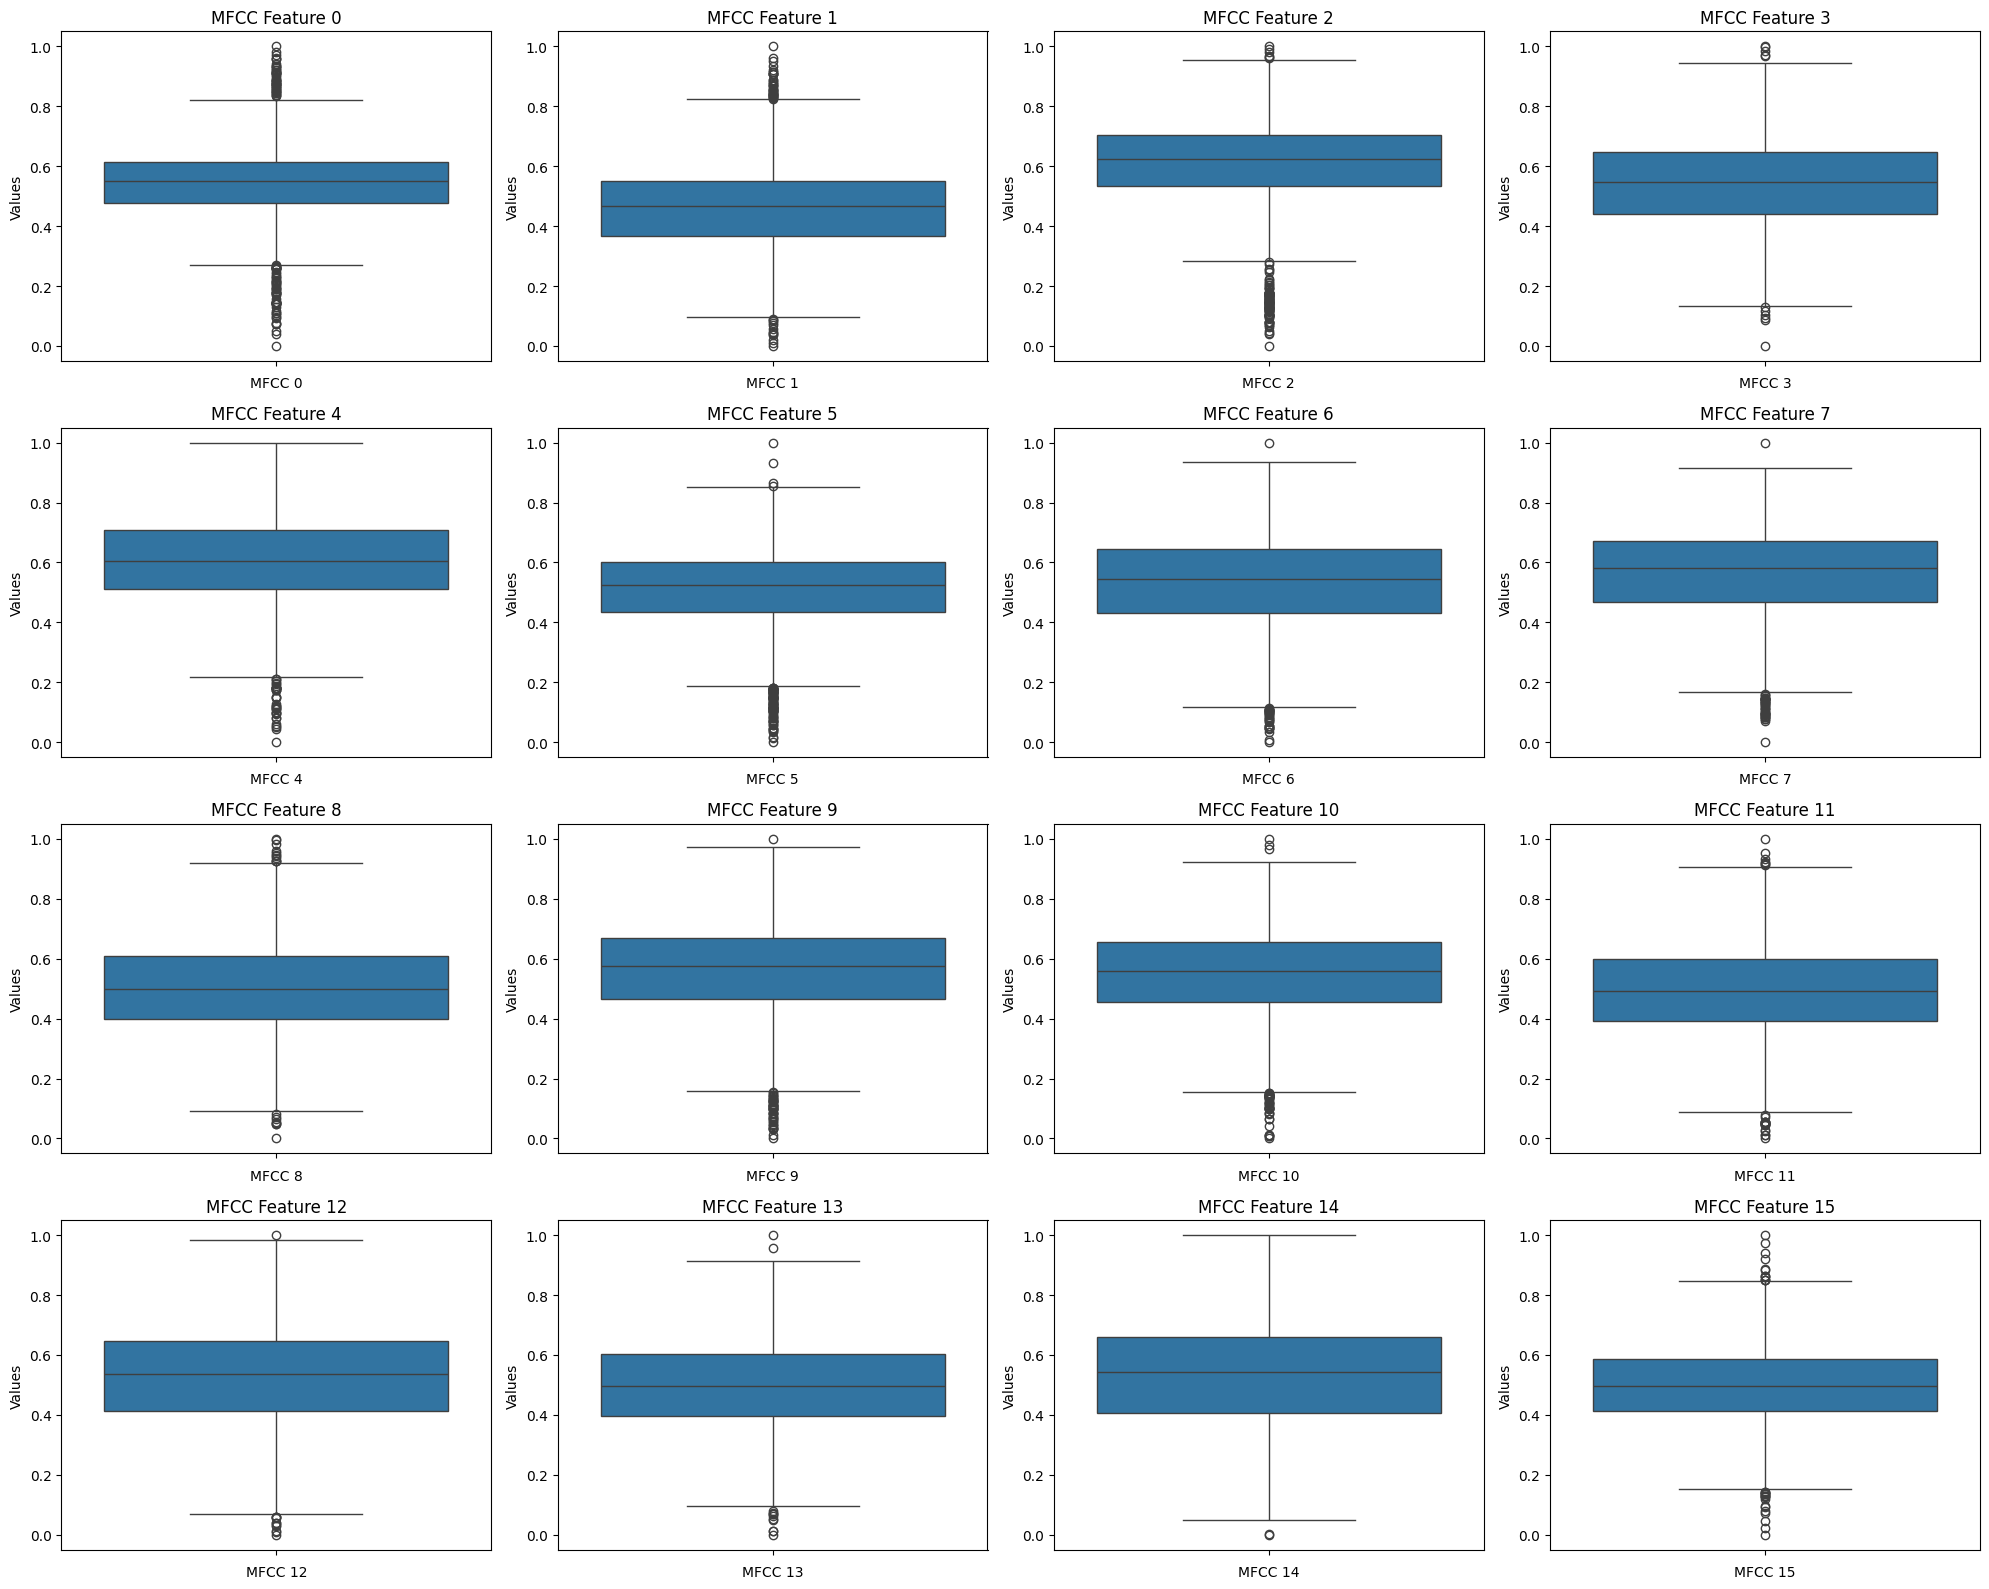

In [15]:
import seaborn as sns

fig, axes = plt.subplots(4, 4, figsize=(20, 16))

axes = axes.flatten()

for i in range(16): 
    sns.boxplot(data=df_scaled.iloc[:, i], ax=axes[i])
    axes[i].set_title(f'MFCC Feature {i}')
    axes[i].set_xlabel(f'MFCC {i}')
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()


In [16]:
# Function to calculate the number of outliers 
def count_outliers(df_gender, n_std=3):
    outlier_count = {}
    for col in df_gender.columns[:-2]: 
        mean = df_gender[col].mean()
        std = df_gender[col].std()
        outliers = df_gender[(df_gender[col] < mean - n_std * std) | (df_gender[col] > mean + n_std * std)]
        outlier_count[col] = len(outliers)
    return outlier_count

outlier_counts = count_outliers(df_gender)

outlier_counts

{0: 50,
 1: 13,
 2: 63,
 3: 5,
 4: 18,
 5: 12,
 6: 5,
 7: 20,
 8: 4,
 9: 20,
 10: 8,
 11: 8,
 12: 1,
 13: 6,
 14: 2,
 15: 11}

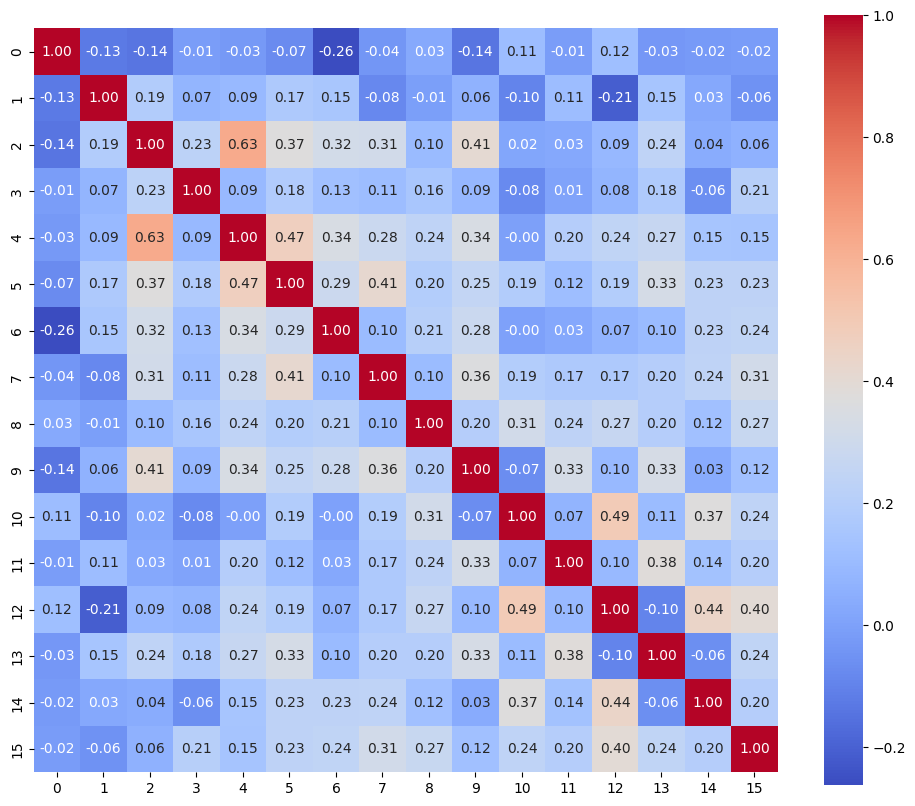

In [17]:

# Plot the heatmap with all values annotated
corr_matrix = df_scaled.drop(columns=['speaker_id','gender_numeric']).corr()

plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Show the plot
plt.show()


In [18]:

X = df_scaled.drop(columns=['speaker_id', 'gender_numeric'])  
y = df_scaled['gender_numeric'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 2162
Test set size: 541


In [19]:
train_distribution = y_train.value_counts(normalize=True)
test_distribution = y_test.value_counts(normalize=True)

print(f"Training set gender distribution:\n{train_distribution}")
print(f"Test set gender distribution:\n{test_distribution}")

Training set gender distribution:
gender_numeric
1    0.508326
0    0.491674
Name: proportion, dtype: float64
Test set gender distribution:
gender_numeric
1    0.508318
0    0.491682
Name: proportion, dtype: float64


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print(classification_report(y_test, y_pred_log))


Logistic Regression Performance:
Accuracy: 0.8872458410351202
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       266
           1       0.88      0.90      0.89       275

    accuracy                           0.89       541
   macro avg       0.89      0.89      0.89       541
weighted avg       0.89      0.89      0.89       541



In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
Accuracy: 0.9759704251386322
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       266
           1       0.96      0.99      0.98       275

    accuracy                           0.98       541
   macro avg       0.98      0.98      0.98       541
weighted avg       0.98      0.98      0.98       541



In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate on the test set
scores = model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {scores[1]}")


Epoch 1/20
61/61 [==============================] - 0s 1ms/step - loss: 0.6479 - accuracy: 0.6848 - val_loss: 0.5820 - val_accuracy: 0.7696
Epoch 2/20
61/61 [==============================] - 0s 406us/step - loss: 0.5440 - accuracy: 0.7810 - val_loss: 0.4708 - val_accuracy: 0.8065
Epoch 3/20
61/61 [==============================] - 0s 362us/step - loss: 0.4412 - accuracy: 0.8170 - val_loss: 0.3832 - val_accuracy: 0.8249
Epoch 4/20
61/61 [==============================] - 0s 368us/step - loss: 0.3701 - accuracy: 0.8350 - val_loss: 0.3263 - val_accuracy: 0.8618
Epoch 5/20
61/61 [==============================] - 0s 362us/step - loss: 0.3207 - accuracy: 0.8602 - val_loss: 0.2918 - val_accuracy: 0.8618
Epoch 6/20
61/61 [==============================] - 0s 364us/step - loss: 0.2967 - accuracy: 0.8674 - val_loss: 0.2901 - val_accuracy: 0.8848
Epoch 7/20
61/61 [==============================] - 0s 360us/step - loss: 0.2690 - accuracy: 0.8910 - val_loss: 0.2570 - val_accuracy: 0.8756
Epoch 8/

In [23]:
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D

# Reshape the input data for Conv1D
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN Accuracy: {cnn_scores[1]}")


Epoch 1/20
61/61 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.7100 - val_loss: 0.6080 - val_accuracy: 0.7558
Epoch 2/20
61/61 [==============================] - 0s 505us/step - loss: 0.5675 - accuracy: 0.7434 - val_loss: 0.5294 - val_accuracy: 0.7235
Epoch 3/20
61/61 [==============================] - 0s 487us/step - loss: 0.4640 - accuracy: 0.8226 - val_loss: 0.4100 - val_accuracy: 0.8479
Epoch 4/20
61/61 [==============================] - 0s 491us/step - loss: 0.3883 - accuracy: 0.8432 - val_loss: 0.3546 - val_accuracy: 0.8571
Epoch 5/20
61/61 [==============================] - 0s 484us/step - loss: 0.3365 - accuracy: 0.8684 - val_loss: 0.3208 - val_accuracy: 0.8802
Epoch 6/20
61/61 [==============================] - 0s 487us/step - loss: 0.3048 - accuracy: 0.8828 - val_loss: 0.2861 - val_accuracy: 0.8894
Epoch 7/20
61/61 [==============================] - 0s 488us/step - loss: 0.2947 - accuracy: 0.8776 - val_loss: 0.2704 - val_accuracy: 0.9032
Epoch 8/

In [24]:
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network', 'CNN'],
    'Accuracy': [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf), scores[1], cnn_scores[1]],
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy
0  Logistic Regression  0.887246
1        Random Forest  0.975970
2       Neural Network  0.926063
3                  CNN  0.909427


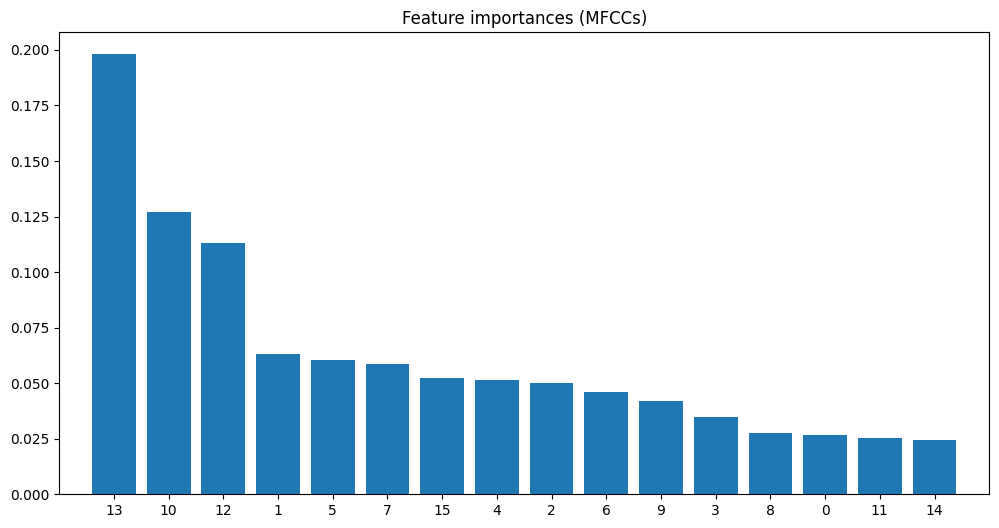

In [25]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature importances (MFCCs)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()
